In [38]:
from itertools import product
from typing import Dict, List, Any

import numpy as np
import matplotlib.pyplot as plt

from IOData.IOData import InputRule

from simulators.track_simulator import TrackSimulator
from simulators.simulation_settings import SafetyFilterTypes, TrackFilterTypes, SimulationInputRule, ModelType
from tools.simualtion_results import Results

from tools.simple_track_generator import trackGenerator

In [39]:
save_fig = False

simualte_type = 'TRACK_SIMULATE'

Simulator = {
    # 'SINGLE_CURVATURE'  : SingleCurvatureSimulator,
    'TRACK_SIMULATE'    : TrackSimulator,
}.get(simualte_type)

simulator = Simulator()
simulator.a_d_max = 2
simulator.delta_d_max = 0.12
simulator.use_saved_data = False
simulator.save_data = False
simulator.simulate_model_type = ModelType.DYNAMIC
simulator.data_model_type = ModelType.DYNAMIC
simulator.filter_model_type = ModelType.DYNAMIC
simulator.t_sim = 20
simulator.num_predicted_traj = 10
simulator.global_initial_state = np.array([0.0, 0.0, 0.0, 0.1, 0.0, 0.0])
simulator.cur = 1/0.5
simulator.track_fun_name = 'round_track'
simulator.lag = 20

simulator.t_data = 10.0
simulator.data_input_rule = InputRule.RANDOM_2_WITH_MEAN

# simulator.n_v_max = 0
# simulator.n_x, simulator.n_y, simulator.n_psi, simulator.n_v = 0,0,0,0
# simulator.n_e_lat_max, simulator.n_mu_max, simulator.n_v_max, simulator.n_l_max = 0,0,0,0 # for test of prediction error

random_seeds = [0]
track_filter_types = [
    # TrackFilterTypes.SINGLE_SEGMENT_ADD_DATA,
    TrackFilterTypes.SINGLE_SEGMENT,
    ]
filter_types = [
    # SafetyFilterTypes.INDIRECT_FITTING_TERMINAL,
    # SafetyFilterTypes.INDIRECT_FIX_MU,
    # SafetyFilterTypes.INDIRECT_ZERO_V,
    SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING,
    SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING_ADD_DATA,
    SafetyFilterTypes.INDIRECT_ZERO_V_WEIGHTING,
    SafetyFilterTypes.INDIRECT_ZERO_V_WEIGHTING_ADD_DATA,
    # SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL,
    # SafetyFilterTypes.INDIRECT_STOP,
    ]
filter_params: Dict[SafetyFilterTypes, List[Dict[str, Any]]] = {
    # SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL: [
    #     # {'lam_sig': 50000, 'L': 150, 'c': [[0.3, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.3, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    # ], # good HP for this terminal ingredient and kinematic model
    # SafetyFilterTypes.INDIRECT_FITTING_TERMINAL: [
    #     # {'lam_sig': 50000, 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    # ], # good HP for this terminal ingredient and kinematic model
    # SafetyFilterTypes.INDIRECT_FIX_MU: [
    #     # {'lam_sig': 50000, 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 150, 'c': [[0.25, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    # ], # good HP for this terminal ingredient and kinematic model
    # SafetyFilterTypes.INDIRECT_ZERO_V: [
    #     # {'lam_sig': 50000, 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    # ], # good HP for this terminal ingredient and kinematic model
    # SafetyFilterTypes.INDIRECT_STOP: [
    #     # {'lam_sig': 50000, 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 50000, 'R': np.matrix('1,0;0,0'), 'L': 200, 'c': [[0.35, 0.1, 0.05, 0.01], [0.1, 0.1, 0.05, 0.01]]},
    # ], # good HP for this terminal ingredient and kinematic model
    # SafetyFilterTypes.INDIRECT_FITTING_TERMINAL: [{'lam_sig': 10000}, {'lam_sig': 50000}, {'lam_sig': 100000}],
    # SafetyFilterTypes.INDIRECT_ZERO_V: [{'L': 80}],
    # SafetyFilterTypes.INDIRECT_STOP: [{'L': 80}],
    # SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL: [{'lam_sig': 200000}],
    SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL: [
        # {'lam_sig': 50000, 'L': 150, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
        {'lam_sig': 150000, 'L': 100, 'R': np.matrix('1,0;0,0'), 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]}, # seemingly good for dynamic model, using data from kinematic model???? larger lam_sig is not working
        # {'lam_sig': 200000, 'L': 100, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
        ], 
    SafetyFilterTypes.INDIRECT_FIX_MU: [
        # {'lam_sig': 50000, 'L': 150, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
        {'lam_sig': 150000, 'L': 100, 'R': np.matrix('1,0;0,0'), 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]}, # seemingly good for dynamic model, using data from kinematic model???? larger lam_sig is not working
        # {'lam_sig': 200000, 'L': 100, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
        ], 
    SafetyFilterTypes.INDIRECT_ZERO_V: [ 
        {'lam_sig': 150000, 'L': 150, 'R': np.matrix('1,0;0,0'), 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]}, # seemingly good for dynamic model, using data from kinematic model???? larger lam_sig is not working
        # {'lam_sig': 200000, 'L': 200, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
        # {'lam_sig': 50000, 'L': 150, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]}
        ],
    SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING: [
        {'lam_sig': 50000, 'L': 100, 'R': np.matrix('1,0;0,1'), 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005], [0.1, 0.05, 0.01, 0.005]]}, # seemingly good for dynamic model, using data from kinematic model???? larger lam_sig is not working
    ],
    SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING_ADD_DATA: [
        {'lam_sig': 50000, 'L': 100, 'R': np.matrix('1,0;0,1'), 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005], [0.1, 0.05, 0.01, 0.005]]},
    ],
    SafetyFilterTypes.INDIRECT_ZERO_V_WEIGHTING: [
        {'lam_sig': 50000, 'L': 200, 'R': np.matrix('1,0;0,1'), 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005], [0.1, 0.05, 0.01, 0.005]]}, # seemingly good for dynamic model, using data from kinematic model???? larger lam_sig is not working
    ],
    SafetyFilterTypes.INDIRECT_ZERO_V_WEIGHTING_ADD_DATA: [
        {'lam_sig': 50000, 'L': 200, 'R': np.matrix('1,0;0,1'), 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01], [0.1, 0.05, 0.01, 0.005], [0.1, 0.05, 0.01, 0.005]]},
    ],
    # SafetyFilterTypes.INDIRECT_STOP: [{'lam_sig': 100000}],
    }
simulation_input_rules = [
    SimulationInputRule.MAX_THROTTLE,
    # SimulationInputRule.MAX_THROTTLE_SINE_STEER,
    # SimulationInputRule.SINE_WITH_MEAN,
    ]


dict_results = simulator.simulate_multi(random_seeds, track_filter_types, filter_types, filter_params, simulation_input_rules)


 
 Simulating random_seed=0, track_filter_type=TrackFilterTypes.SINGLE_SEGMENT, filter_type=SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING, simulation_input_type=SimulationInputRule.MAX_THROTTLE
vehicle traveld to previous segment 0!
vehicle traveld to previous segment 0!
vehicle traveld to previous segment 0!
vehicle traveld to previous segment 0!
vehicle traveld to previous segment 0!
vehicle traveld to previous segment 0!
vehicle traveld to previous segment 0!
vehicle traveld to previous segment 0!
vehicle traveld to previous segment 0!
vehicle traveld to previous segment 0!
vehicle traveld to previous segment 0!
vehicle traveld to previous segment 0!
vehicle traveld to previous segment 0!
vehicle traveld to previous segment 0!
vehicle traveld to previous segment 0!
vehicle traveld to previous segment 0!
vehicle traveld to previous segment 0!
vehicle traveld to previous segment 0!
vehicle traveld to previous segment 0!
vehicle traveld to previous segment 0!
vehicle traveld to previous

At t = 0.000411562, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results
vehicle traveld to previous segment 0!
vehicle traveld to previous segment 0!
vehicle traveld to previous segment 0!


At t = 0.00202326, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results
vehicle traveld to previous segment 0!
vehicle traveld to previous segment 0!

 
 Simulating random_seed=0, track_filter_type=TrackFilterTypes.SINGLE_SEGMENT, filter_type=SafetyFilterTypes.INDIRECT_ZERO_V_WEIGHTING, simulation_input_type=SimulationInputRule.MAX_THROTTLE


At t = 0.00573187, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 0.00371598, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 0.00522175, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 0.0022395, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 0.00905735, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 0.0094824, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 0.00184392, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 0.00766309, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 0.00150843, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 0.00300439, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 0.00665033, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results

 
 Simulating random_seed=0, track_filter_type=TrackFilterTypes.SINGLE_SEGMENT, filter_type=SafetyFilterTypes.INDIRECT_ZERO_V_WEIGHTING_ADD_DATA, simulation_input_type=SimulationInputRule.MAX_THROTTLE


At t = 0.0055982, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 0.00340785, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 0.00839287, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 7.14606e-05, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 0.0032332, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 0.00869257, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 0.00914008, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 0.00106015, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 0.00682886, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 0.00218632, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


At t = 0.000392372, mxstep steps taken before reaching tout.


Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:1401:
Error in Function::call for 'F' [CvodesInterface] at .../casadi/core/function.cpp:330:
.../casadi/interfaces/sundials/cvodes_interface.cpp:392: CVode returned "CV_TOO_MUCH_WORK". Consult CVODES documentation. during simulation of real system, returning partial results


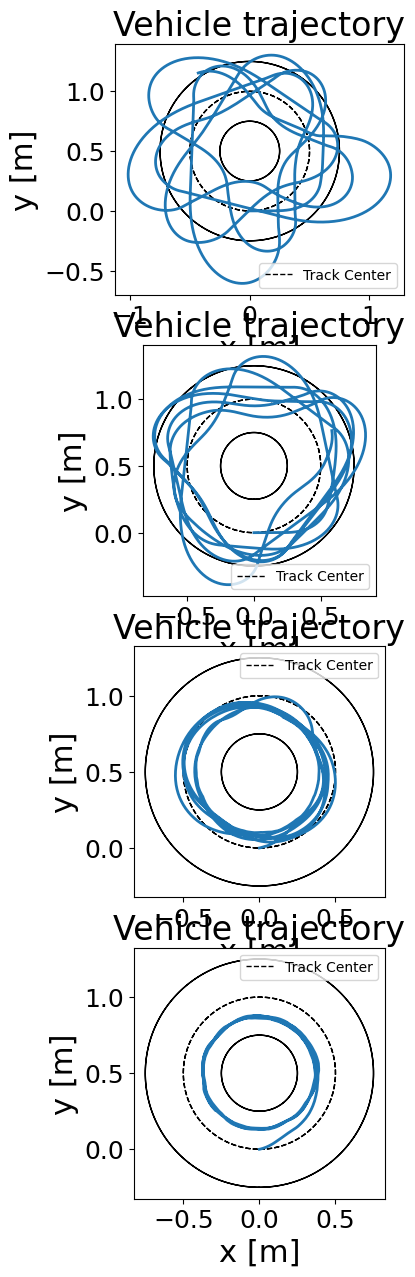

In [40]:
# plot global trajectory and track
random_seed = random_seeds[0]
n_rows, n_cols = len(filter_types), len(simulation_input_rules)
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, squeeze=False, figsize=(20*n_rows,15*n_cols))
for i, j in product(range(n_rows), range(n_cols)):
    results = dict_results[(random_seed, track_filter_types[0], filter_types[i], simulation_input_rules[j])][0]
    if results is not None:
        results.plot_vehicle_trajectory(ax=axs[i,j], gen=simulator.track_generator)
plt.show()
if save_fig:
    fig.savefig('track_simulation.png')

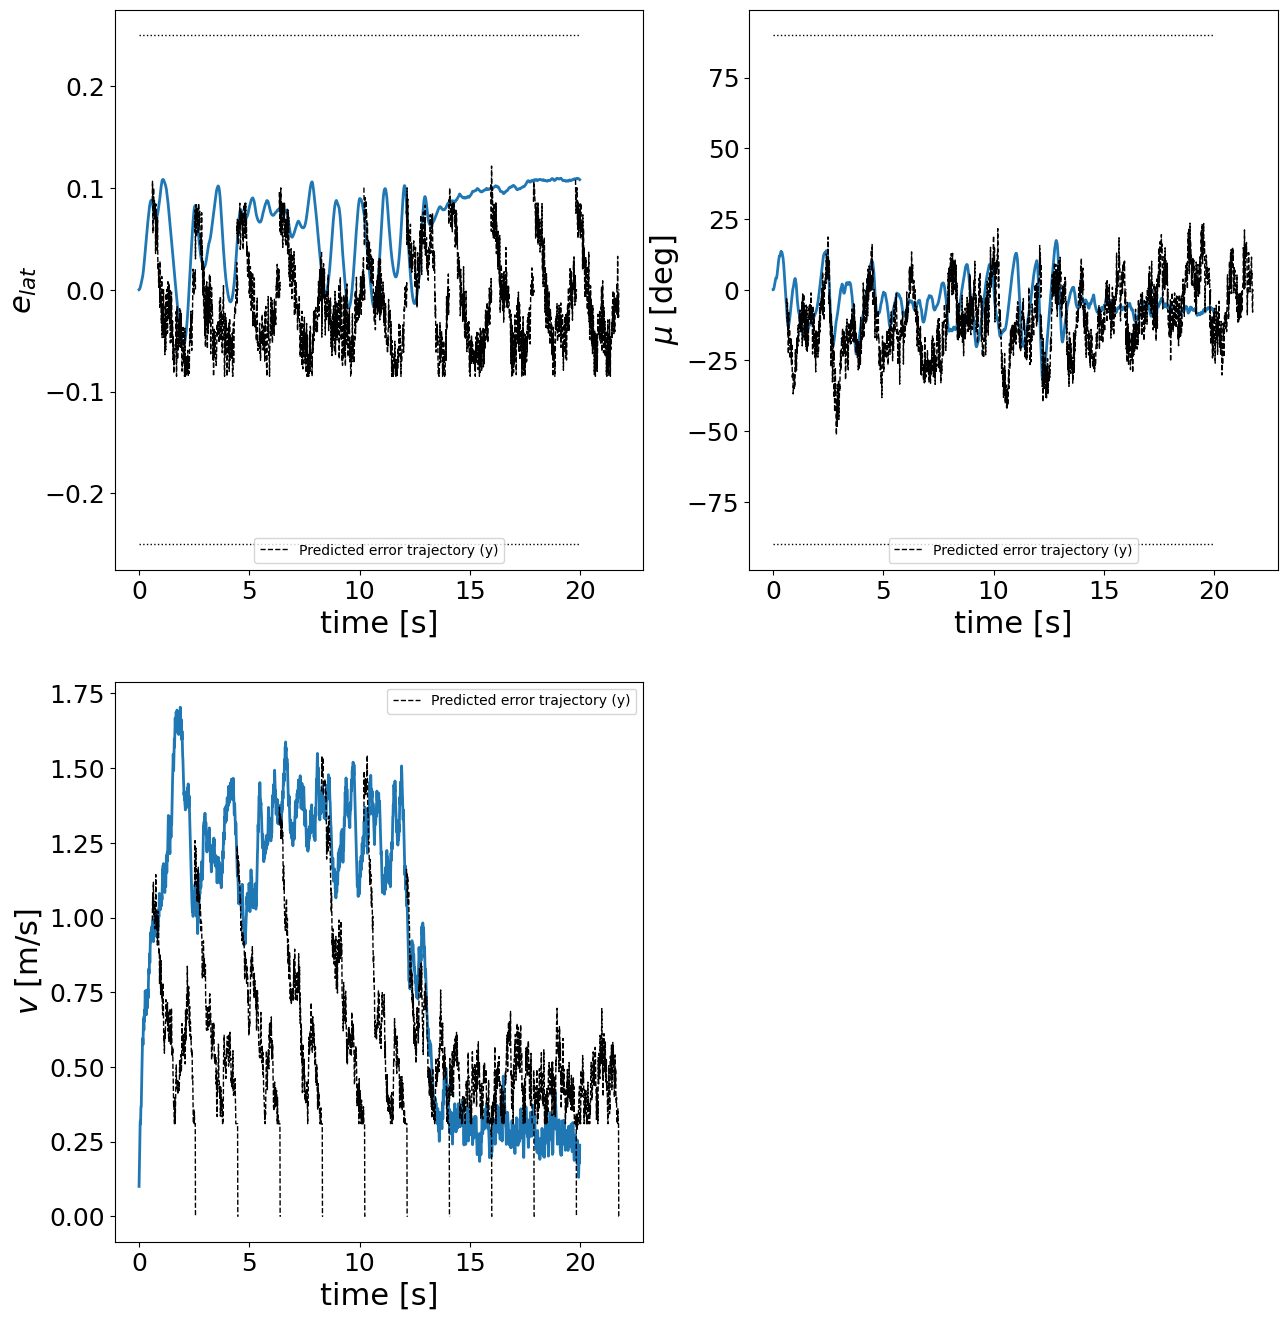

In [41]:
# choose one result to plot details
results = dict_results[(random_seed, track_filter_types[0], SafetyFilterTypes.INDIRECT_ZERO_V_WEIGHTING, simulation_input_rules[0])][0]
# results = dict_results[(random_seed, track_filter_types[0], SafetyFilterTypes.INDIRECT_ZERO_V, simulation_input_rules[0])][0]

# plot given error dynamics trajectory
plt.figure(figsize=(15,16))
#velocity input
ax = plt.subplot(221)
results.plot_error_trajectory(0, ax, constraint=(-simulator.track_width/2, simulator.track_width/2))
results.plot_predicted_error_slices(0, ax)
ax = plt.subplot(222)
results.plot_error_trajectory(1, ax, constraint=(simulator.mu_min*180/np.pi, simulator.mu_max*180/np.pi))
results.plot_predicted_error_slices(1, ax)
ax = plt.subplot(223)
results.plot_error_trajectory(2, ax)
results.plot_predicted_error_slices(2, ax)
plt.show()

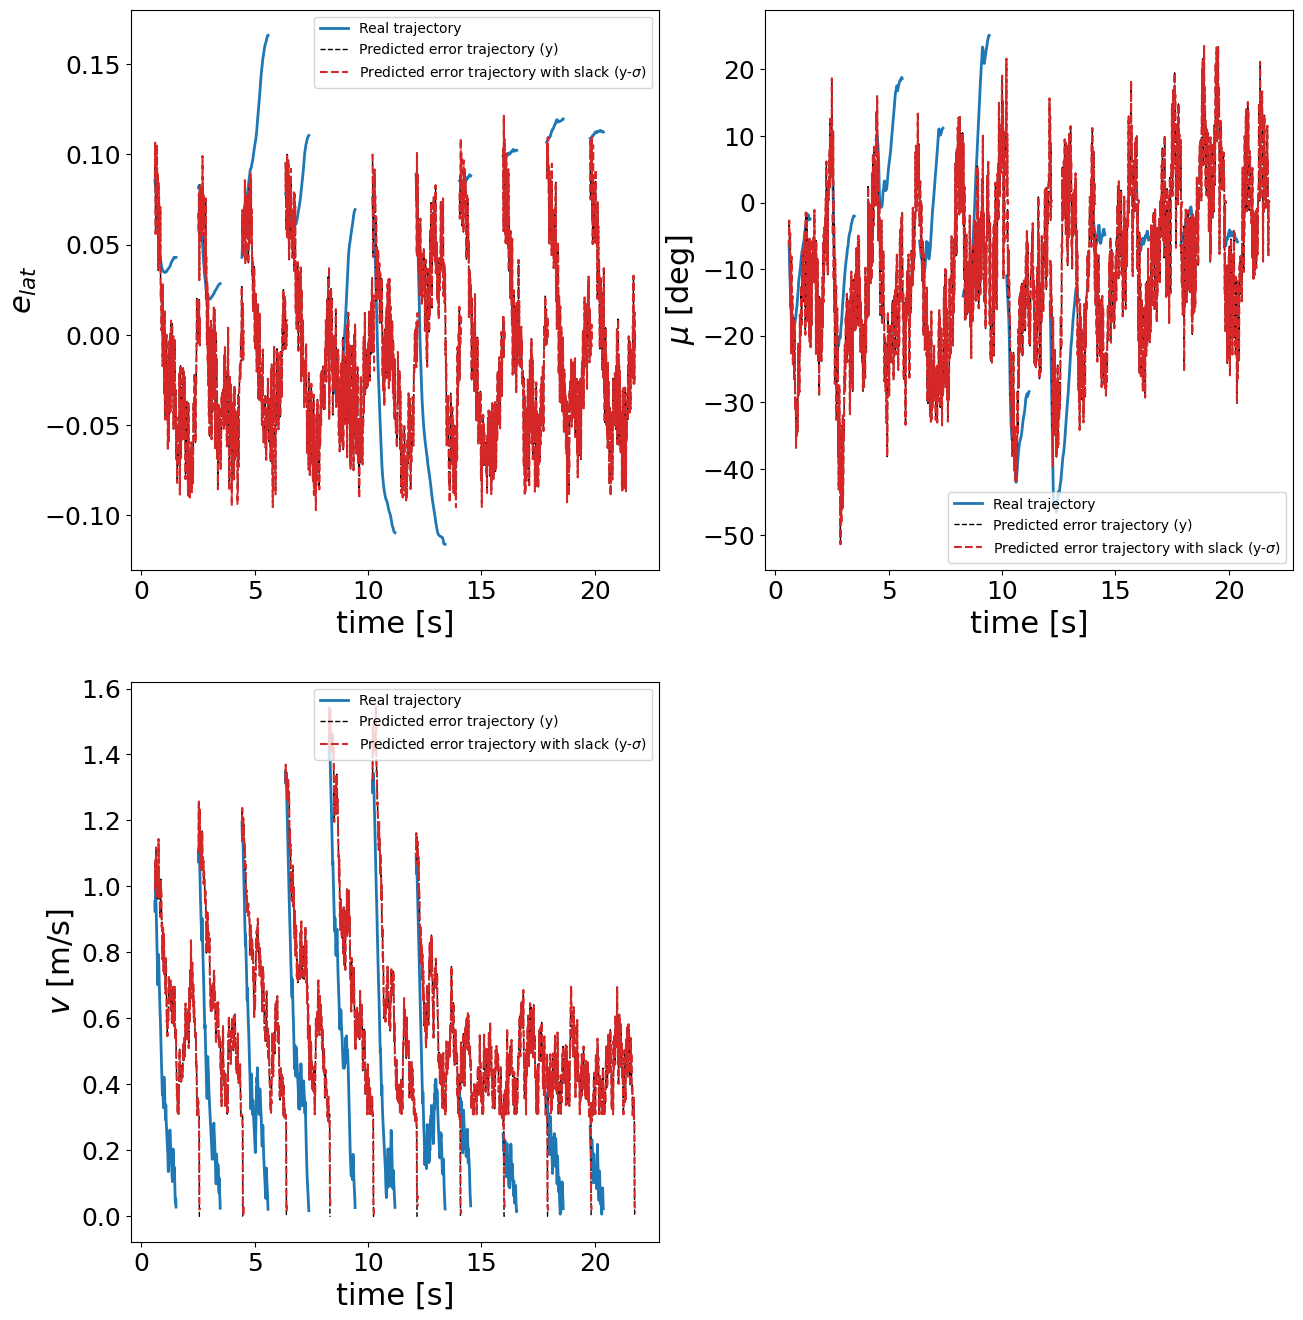

In [42]:
# plot given predicted trajectory and real trajectory
# plt.rcParams['text.usetex'] = True
plt.figure(figsize=(15,16))
#velocity input
ax = plt.subplot(221)
# results.plot_error_trajectory(0, ax, constraint=(-simulator.track_width/2, simulator.track_width/2))
results.plot_error_slices(0, ax, line_style=results.trajecory_style)
results.plot_predicted_error_slices(0, ax, label_y_axis=True)
results.plot_predicted_error_with_slack_slices(0, ax, line_style={'color': 'tab:red', 'linestyle': '--', 'linewidth': 1.5})
ax = plt.subplot(222)
# results.plot_error_trajectory(1, ax, constraint=(simulator.mu_min*180/np.pi, simulator.mu_max*180/np.pi))
results.plot_error_slices(1, ax, line_style=results.trajecory_style)
results.plot_predicted_error_slices(1, ax, label_y_axis=True)
results.plot_predicted_error_with_slack_slices(1, ax, line_style={'color': 'tab:red', 'linestyle': '--', 'linewidth': 1.5})
ax = plt.subplot(223)
# results.plot_error_trajectory(2, ax)
results.plot_error_slices(2, ax, line_style=results.trajecory_style)
results.plot_predicted_error_slices(2, ax, label_y_axis=True)
results.plot_predicted_error_with_slack_slices(2, ax, line_style={'color': 'tab:red', 'linestyle': '--', 'linewidth': 1.5})
plt.show()

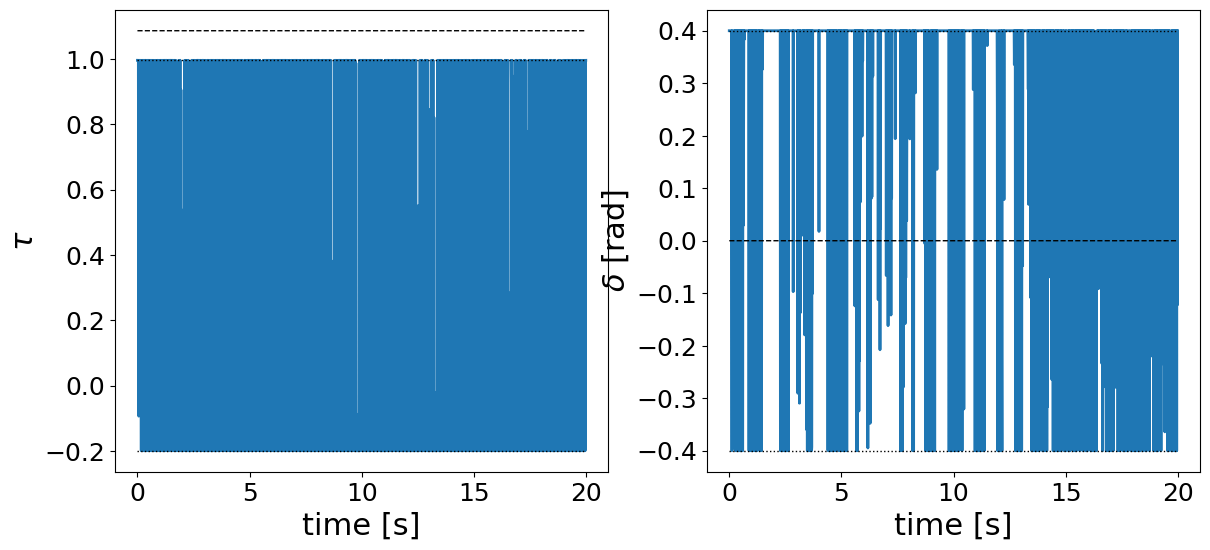

In [43]:
# plot given and applied inputs
plt.figure(figsize=(14,6))
ax = plt.subplot(121)
results.plot_input_applied(0, ax, constraint=(simulator.a_min*simulator.m, simulator.a_max*simulator.m))
results.plot_input_obj(0, ax)
ax = plt.subplot(122)
results.plot_input_applied(1, ax, constraint=(-simulator.delta_max, simulator.delta_max))
results.plot_input_obj(1, ax)
plt.show(block=True)

In [44]:
sigma_max = results.calculate_sigma_infty_value()
print(sigma_max)

(0.0004025907578737442, 0.08770965890176768)


In [45]:
sigma_max[1]/np.pi*180

5.02539327760334

In [46]:
def plot_average_itervention(ax: plt.Axes, results: Dict[TrackFilterTypes, Results]) -> plt.Axes:
    """Plot the average intervention for the input corresponds to the input."""
    width = 0.3 # width of bar

    x = np.arange(len(results))
    input_names = ['Torque', 'steering']

    offset = -width/2
    rects = ax.bar(x + offset, [round(result.average_intervention[0],2) for result in results.values()], width, label=input_names[0], color='tab:blue')
    ax.bar_label(rects, padding=3)
    ax.set_ylim(0, 1.5)
    ax.set_ylabel('Torque Intervention')
    ax.legend(loc='upper left', ncols=2)

    ax = ax.twinx()  # instantiate a second axes that shares the same x-axis
    offset = width/2
    rects = ax.bar(x + offset, [round(result.average_intervention[1],2) for result in results.values()], width, label=input_names[1], color='tab:red', hatch='///')
    ax.bar_label(rects, padding=3)
    ax.set_ylim(0, 0.3)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Steering Intervention')
    ax.set_title('MSR Input Intervention for Different Terminal Ingredients')
    ax.set_xticks(x, [key.value for key in results.keys()])
    ax.legend(loc='upper right', ncols=2)
    

{<SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING: 'fix mu with weighting'>: <tools.simualtion_results.Results object at 0x13a19a280>, <SafetyFilterTypes.INDIRECT_FIX_MU_WEIGHTING_ADD_DATA: 'fix mu with\n weighting and add data'>: <tools.simualtion_results.Results object at 0x153173d30>, <SafetyFilterTypes.INDIRECT_ZERO_V_WEIGHTING: 'stop at \n center line \n with weighting'>: <tools.simualtion_results.Results object at 0x13c32c7f0>, <SafetyFilterTypes.INDIRECT_ZERO_V_WEIGHTING_ADD_DATA: 'stop at \n center line \n with weighting \n and add data'>: <tools.simualtion_results.Results object at 0x13c6900d0>}


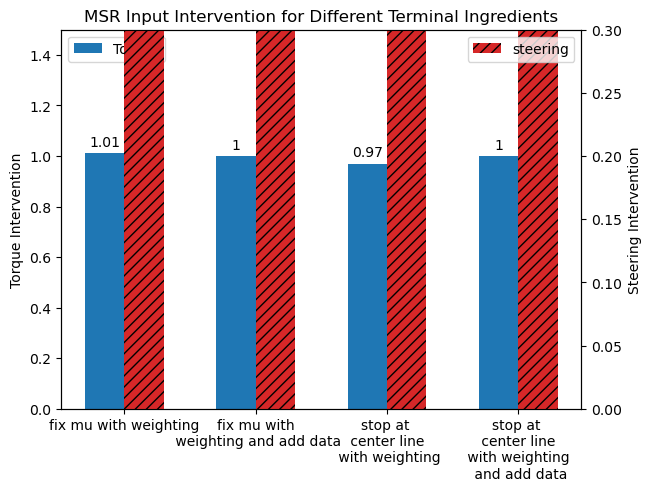

In [47]:
results_dict_filter_types = {
    key[2]: result_list[0] for key, result_list in dict_results.items()
}
print(results_dict_filter_types)
fig, ax = plt.subplots(layout='constrained')

ax = plot_average_itervention(ax, results_dict_filter_types)

In [48]:
simulator.systems[0].get_noise()

matrix([[ 0.00067206],
        [-0.00535613],
        [-0.00278697],
        [-0.00376396]])

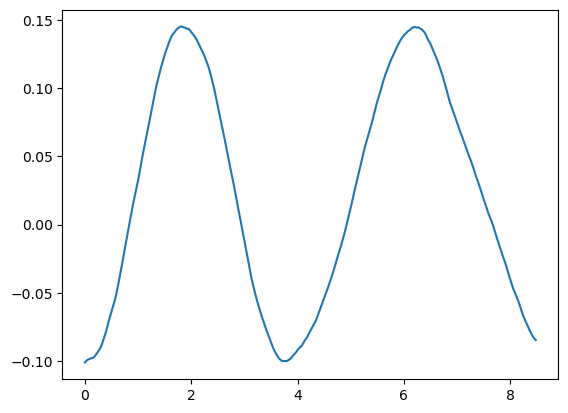

In [49]:
io_data = simulator.io_data_dict[1/0.5]

plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[0,0] for y in io_data._output_data])

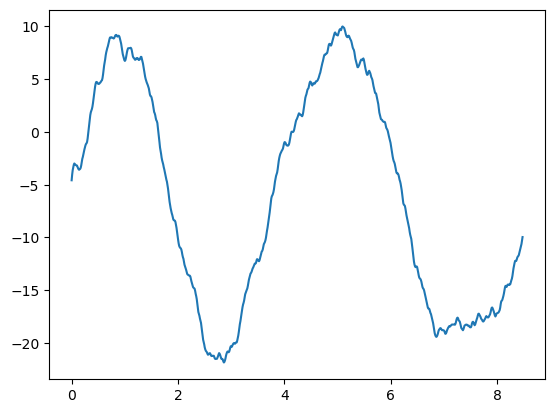

In [50]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[1,0]*180/np.pi for y in io_data._output_data])

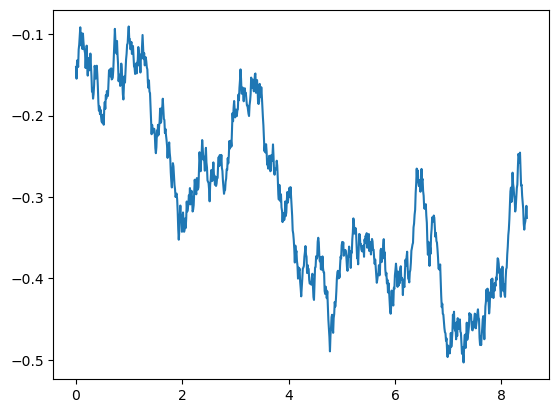

In [51]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[2,0] for y in io_data._output_data])

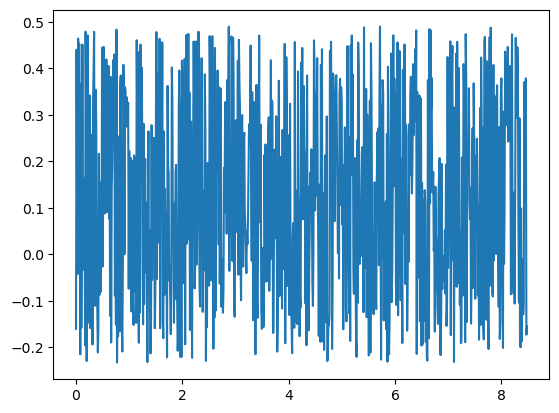

In [52]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [u[0,0] for u in io_data._input_data])

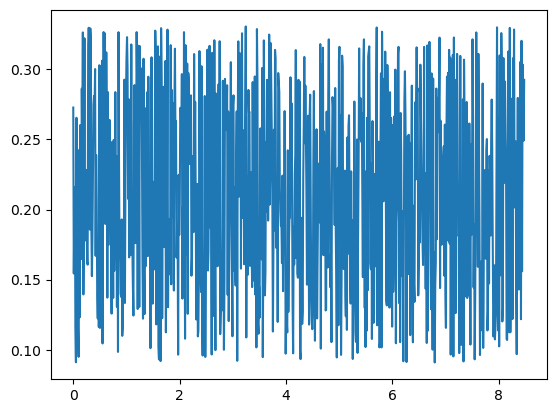

In [53]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [u[1,0] for u in io_data._input_data])

In [54]:
print(simulator.systems[0].get_zero_input())
print(simulator.systems[0].get_zero_state())

[0.12906045 0.21056226]
[ 0.         -0.09163004  1.          0.09188735  2.00842554  0.        ]


In [55]:
U, S, V = np.linalg.svd(io_data.H_input)
print(S)

[89.20951817  8.91104819  8.88300206  8.86097393  8.61108963  8.07297804
  8.04717422  7.99044729  7.97709649  7.83754391  7.75064808  7.71147244
  7.69224058  7.65436536  7.61941117  7.60662607  7.56564982  7.3292201
  7.30438311  7.25529333  7.23743216  7.20182179  7.18689497  7.13509352
  7.12316207  7.0728491   6.79018714  6.7143331   6.70031561  6.68271602
  6.5912474   6.51660926  6.5026727   6.46629962  6.44483747  6.39574017
  6.36543623  6.35975705  6.34931269  6.31060248  6.30005505  6.2881286
  6.27792834  6.22661969  6.2101846   6.16928044  6.16244507  6.1162346
  6.08081775  6.07520899  6.0668353   6.06583437  6.04075922  6.00205236
  5.9879244   5.98358466  5.96849072  5.96372243  5.96160929  5.94776033
  5.90558505  5.838125    5.83752425  5.811597    5.8014032   5.78324847
  5.76404743  5.72151232  5.6870498   5.66177362  5.65816311  5.63084439
  5.6239482   5.61895374  5.60867129  5.59577722  5.58517488  5.57070838
  5.52263005  5.51989267  5.48010671  5.47403865  5.45